In [1]:
import pandas as pd

df_wine = pd.read_csv('./python-machine-learning-book-2nd-edition-master/code/ch04/wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_wine.iloc[:,1:].values
y = df_wine.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [49]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):
                
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(scores)
            
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            print(self.indices_)
            dim -=1
            
            self.scores_.append(scores[best])
        
        self.k_score_ = self.scores_[-1]
         
        return self
    
    
    def transform(self, X):
        
        return X[:, self.indices_]

        
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        
        self.estimator.fit(X_train[:,indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        
        score = self.scoring(y_test, y_pred)
        return score

(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
(0, 2, 3, 5, 6, 7, 8, 9, 10, 11)
(0, 2, 3, 5, 6, 7, 8, 9, 10)
(0, 2, 3, 5, 6, 7, 8, 10)
(0, 2, 3, 5, 6, 8, 10)
(0, 2, 3, 5, 8, 10)
(0, 2, 3, 8, 10)
(0, 2, 3, 8)
(0, 3, 8)
(0, 8)
(8,)


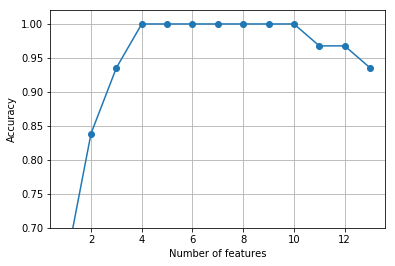

In [50]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)

sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')

plt.grid()